In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# total mortality over people infected with MRSA
infectedmale = 5575
infectedfemale = 3426
malemort = 2105
femalemort = 1345
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.38329074547272524

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
totalmort = malemort + femalemort
totalmort

3450

In [8]:
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

2136.8459060104433

In [9]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

1313.1540939895567

In [10]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278) })

In [11]:
monthlymort

,Month,MRSA infection,7 day mortality,30 day mortality
0,Jan,872,207,385
1,Feb,758,176,318
2,Mar,808,184,332
3,Apr,789,162,299
4,May,757,148,287
5,Jun,741,143,292
6,Jul,785,147,281
7,Aug,731,123,235
8,Sep,650,115,231
9,Oct,681,133,259


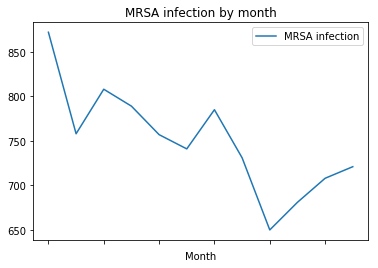

In [12]:
monthlymort.plot('Month','MRSA infection', title="MRSA infection by month")

In [13]:
sns.lineplot(x='MRSA infection', y='Month', data= monthlymort)

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [ ]:
sns.lmplot(y="7 day mortality", x="30 day mortality", data=monthlymort)

In [ ]:
sns.lmplot(x = "MRSA infection", y = "7 day mortality", data = monthlymort)

In [ ]:
sns.lmplot(x = "MRSA infection", y = "30 day mortality", data = monthlymort)

In [ ]:
monthlymort.sum()

In [ ]:
# total monthly infection / days in a year = average daily infection
9001/365

In [ ]:
ageMort = pd.DataFrame({"Age Group": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

In [ ]:
ageMort.std()

In [ ]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [ ]:
ageMort

In [ ]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [ ]:
# Simulated data for Infections per year and 7 and 30 day mortality

# The <15 category uses the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [ ]:
a

In [ ]:
a.sum()

In [ ]:
#Fake data
n = np.arange(0, 100, 1)
s = 20 * n + 10 + np.random.normal (0.0, 5.0, n.size)

In [ ]:
s

In [ ]:
# Fake data for daily infection of males and females
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})
infection

In [ ]:
infection.sum()

In [ ]:
infection.describe()

In [18]:
sns.__version__

'0.8.1'